<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_1309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Play with different convolutions

In [ ]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import misc 
from scipy import misc
i = misc.ascent() # Get an 8-bit grayscale bit-depth, 512 x 512 derived image

In [ ]:
# print shape of image
i.shape

(512, 512)

In [ ]:
# print max-pixel value
i.max()

255

**Draw the image**

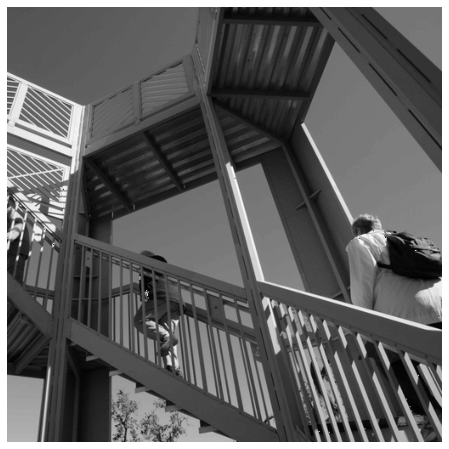

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

**Stored image as numpy array:** we can create transformed image by just copying array and also save it dimension of image.

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

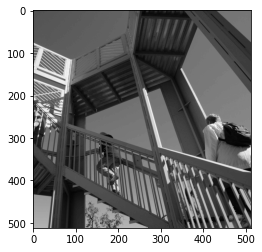

In [ ]:
plt.imshow(i_transformed)

**we create filters of size (3*3)**
For more details: visit https://en.wikipedia.org/wiki/Kernel_(image_processing) <br> 
Also visit https://lodev.org/cgtutor/filtering.html

In [ ]:
# Edge detection filters
# filter = np.matrix([[1,0,-1],[0,0,0],[-1,0,1]])
# filter = np.matrix([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])
# filter = np.matrix([[0,-1,0],[-1,4,-1],[0,-1,0]])
# filter = np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,1]])
filter = np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1]])
#filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# For Sharping image
# filter = np.matrix([[0,-1,0],[-1,5,-1],[0,-1,0]])

# For Blur image (normalized)
# filter = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 0.1111

# Guassian Blur (3*3)
# filter = np.matrix([[1,2,1],[2,4,2],[1,2,1]]) * 0.0625

# Guassian Blur (5*5)
# filter = np.matrix([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]]) * 0.00390625

# unsharp Blur (5*5)
# filter = np.matrix([[1,4,6,4,1],[4,16,24,16,4],[6,24,-476,24,6],[4,16,24,16,4],[1,4,6,4,1]]) * (-0.00390625)

**Note:** play will above different-different filters by uncommenting them!

In [ ]:
# If all the digits in the filter don't add up to 0 or 1, then
# we should probably do a weight to get it to do so
# so, for example, if weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

**Create a convolution:**  <br>
We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [ ]:
def convolve(img,x,y,filter,fx,fy):

  convolution = 0.0

  for i in range(-fx,fy+1):
    for j in range(-fx,fy+1):
      convolution = convolution + img[x-i,y-j] * filter[fy - j,fx - i]
  return convolution

In [ ]:
def convolution(img,img_transformed,filter,weight=1):
  img_size_x = img_transformed.shape[0]
  img_size_y = img_transformed.shape[1]
  fx = int(filter.shape[0]/2)
  fy = int(filter.shape[1]/2)

  for x in range(fx, img_size_x-fx):
    for y in range(fy, img_size_y-fy):
      convo = convolve(img,x,y,filter,fx,fy)
      convo = convo * weight
      if convo < 0:
        img_transformed[x,y] = 0
      elif convo > 255:
        img_transformed[x,y] = 255
      else:
        img_transformed[x,y] = convo

  print(img_transformed)
  return img_transformed

In [ ]:
transformed_image = convolution(img = i,img_transformed = i_transformed,filter = filter,weight = weight)

[[ 83  83  83 ... 117 117 117]
 [ 82   5   4 ...   0   0 117]
 [ 80   8   6 ...   0   0 117]
 ...
 [178   0   0 ...  13   8  57]
 [178   0   0 ...  38   3  57]
 [178 178 178 ...  57  57  58]]


**Plot tranformed image: we can see effect of convolution using diffrent filters**

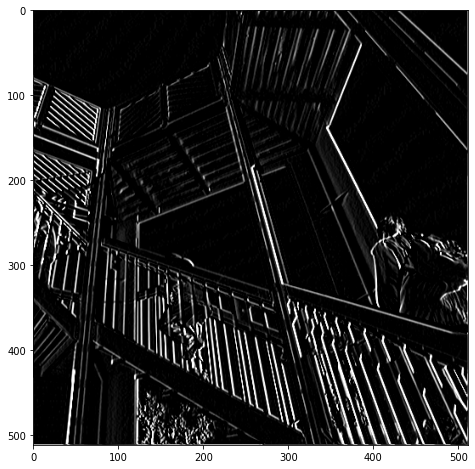

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(transformed_image)
#plt.axis('off')
plt.show() 

**After Pooling** - Max Pooling

In [ ]:
def pooled(image,x,y,pool_size):
  pix = []
  for i in range(pool_size[0]):
    for j in range(pool_size[1]):
      pix.append(image[x+i,y+j])
  return pix

def pooling(image,pool_size=(2,2)):
  if image.shape[0]%pool_size[0] != 0:
    img_row = pool_size[0] - image.shape[0]%pool_size[0]
    image = np.append(image,np.zeros((img_row,image.shape[1]),dtype=int),axis=0)
  if image.shape[1]%pool_size[1] != 0:
    img_col = pool_size[1] - image.shape[1]%pool_size[1]
    image = np.append(image,np.zeros((image.shape[0],img_col),dtype=int),axis=1)
  size_x = image.shape[0]
  size_y = image.shape[1]

  new_img_x = int(size_x/pool_size[0])
  new_img_y = int(size_y/pool_size[1])

  new_Img = np.zeros((new_img_x,new_img_y))
  for x in range(0,size_x,pool_size[0]):
    for y in range(0,size_y,pool_size[1]):
      pixels = pooled(image,x,y,pool_size)
      new_Img[int(x/pool_size[0]),int(y/pool_size[1])] = max(pixels)
  return new_Img

In [ ]:
new_Image = pooling(transformed_image,pool_size=(3,3)) # we can change pooling size here

In [ ]:
print("Image size before pooling: ",transformed_image.shape)
print("Image size after pooling: ",new_Image.shape)

Image size before pooling:  (512, 512)
Image size after pooling:  (171, 171)


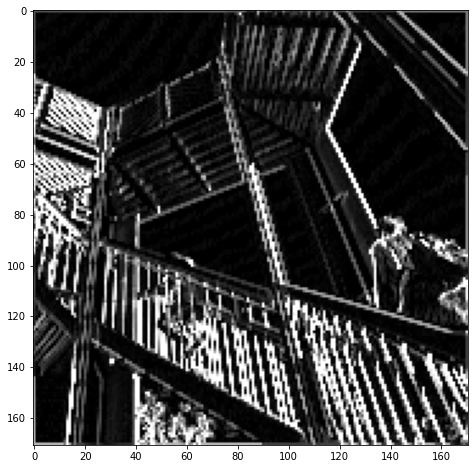

In [ ]:
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(new_Image)
#plt.axis('off')
plt.show() 